## Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

# Chapter 7: Classification 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Classification models


### Example of designing a classification model


### Classification Algorithms


## K-Nearest Neighbors (KNN)


### Example of using KNN for classification

In [2]:
applicant_df = pd.read_csv('CustomerLoan.csv')
applicant_df.drop(columns = ['Name'],inplace=True)
applicant_df

,income,score,default
0,78479,800,NO
1,95483,801,NO
2,101641,815,NO
3,104234,790,NO
4,108726,795,NO
5,112845,750,NO
6,114114,799,NO
7,114799,801,NO
8,119147,805,NO
9,119976,790,NO


In [3]:
newApplicant = applicant_df.iloc[20]
newApplicant

income     98487
score        785
default      NaN
Name: 20, dtype: object

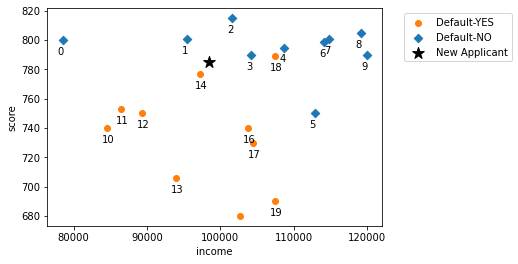

In [4]:
applicant_df = pd.read_csv('CustomerLoan.csv')
applicant_df.drop(index = [20],inplace=True)
fig, ax = plt.subplots()

subset = applicant_df.loc[applicant_df['default']=='Yes']
ax.scatter(subset.income, subset.score, marker='o', label='Default-YES', color='C1')

subset = applicant_df.loc[applicant_df['default']=='NO']
ax.scatter(subset.income, subset.score, marker='D', label='Default-NO', color='C0')

ax.scatter(newApplicant.income, newApplicant.score, marker='*', label='New Applicant', color='black', s=150)

plt.xlabel('income')  # set x-axis label
plt.ylabel('score')  # set y-axis label

for _, row in applicant_df.iterrows():
    ax.annotate(row.Name, (row.income -700, row.score-10))
    
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles, labels, bbox_to_anchor=(1.05, 1))

plt.show()

In [5]:
applicant_df = pd.read_csv('CustomerLoan.csv')
applicant_df['income_Normalized'] = (applicant_df.income - applicant_df.income.min())/(applicant_df.income.max() - applicant_df.income.min())
applicant_df['score_Normalized'] = (applicant_df.score - applicant_df.score.min())/(applicant_df.score.max() - applicant_df.score.min())

In [6]:
applicant_df.drop(columns = ['Name'])

,income,score,default,income_Normalized,score_Normalized
0,78479,800,NO,0.000000,0.888889
1,95483,801,NO,0.409765,0.896296
2,101641,815,NO,0.558161,1.000000
3,104234,790,NO,0.620647,0.814815
4,108726,795,NO,0.728896,0.851852
5,112845,750,NO,0.828156,0.518519
6,114114,799,NO,0.858737,0.881481
7,114799,801,NO,0.875244,0.896296
8,119147,805,NO,0.980023,0.925926
9,119976,790,NO,1.000000,0.814815


In [7]:
from sklearn.neighbors import KNeighborsClassifier

predictors = ['income_Normalized','score_Normalized']
target = 'default'

Xs = applicant_df[predictors].drop(index=[20])
y= applicant_df[target].drop(index=[20])

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(Xs, y)

newApplicant = pd.DataFrame({'income_Normalized': 
                             applicant_df.iloc[20].income_Normalized,
                             'score_Normalized': 
                             applicant_df.iloc[20].score_Normalized},
                            index = [20])
predict_y = knn.predict(newApplicant)
print(predict_y)

['NO']


## Decision Trees
### Example of using Decision Trees for classification

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

predictors = ['income','score']
target = 'default'

Xs = applicant_df[predictors].drop(index=[20])
y= applicant_df[target].drop(index=[20])

classTree = DecisionTreeClassifier()
classTree.fit(Xs, y)

predict_y = classTree.predict(newApplicant)
print(predict_y)

['Yes']


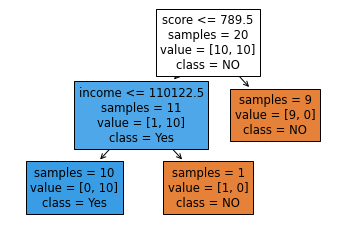

In [9]:
from sklearn.tree import plot_tree
plot_tree(classTree, 
          feature_names=predictors,  
          class_names=y.unique(),
          filled=True,
          impurity=False)
plt.show()